# Ensembles

In [1]:
# Get basic libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#plt.style.use("fivethirtyeight")

In [2]:
# Figure Customization
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [12,9]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['image.cmap'] = 'viridis'

In [3]:
# Font Settings
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = '18'

In [4]:
# Save Figure Customization
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.5

In [5]:
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.labelpad'] = 10
#plt.rcParams['axes3d.grid'] = False

In [6]:
plt.rcParams["grid.linestyle"] = "-"
plt.rcParams["grid.linewidth"] = 0.3
plt.rcParams["grid.color"] = (0.5, 0.5, 0.5, 0.5)

In [7]:
# Line Customization
plt.rcParams['lines.linewidth'] = 0.3

In [8]:
# Tick Customization
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.major.pad'] = 10.0
plt.rcParams['ytick.major.pad'] = 10.0
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8


In [9]:
def hide_spines():
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in plt._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            #ax.spines['right'].set_color('none')
            #ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')

In [109]:
# Get Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
# Create metrics to store
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [24]:
# Create datasets for demo
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

## Create Dataset & Preprocessing

In [117]:
# Create a 10 feature dataset to do the analysis
X8, y = make_classification(n_samples = 10000, n_features=8, n_redundant=0, 
                             n_informative=8, random_state=250, n_classes = 2)

In [ ]:
# Actual 3 variable dataset for our example
X = MDS(n_components=3, n_jobs=-1).fit_transform(X8)
X = StandardScaler().fit_transform(X)

## Create Additional Feature Set

In [27]:
# Create a pca function to transform 3 features to 2 dimensions
pca = PCA(n_components=2).fit(X)

In [28]:
XT = pca.transform(X)

In [29]:
X = np.c_[X, XT]

In [30]:
# Create train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

## Visualise the Dataset

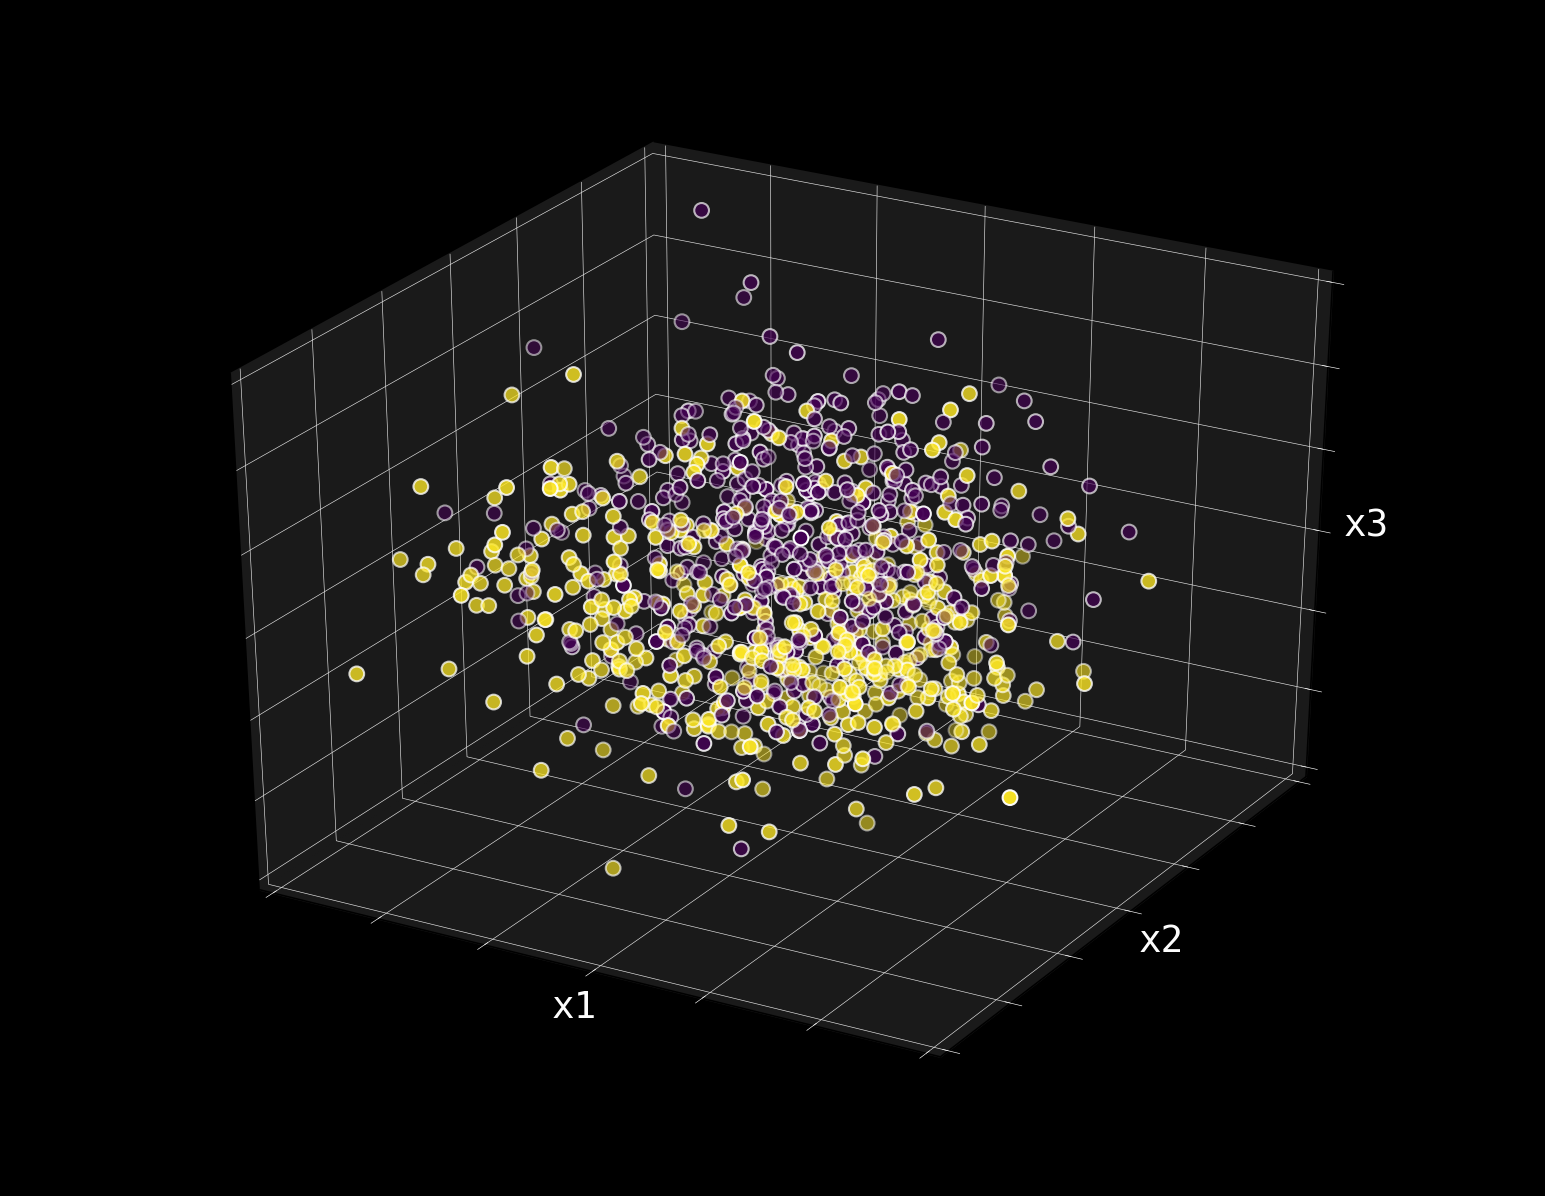

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c= y, s = 50)

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")

ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.zaxis.set_major_formatter(plt.NullFormatter())

ax.xaxis.labelpad = -7
ax.yaxis.labelpad = -7
ax.zaxis.labelpad = -7

ax.w_xaxis.set_pane_color((0.1, 0.1, 0.1, 1.0))
ax.w_yaxis.set_pane_color((0.1, 0.1, 0.1, 1.0))
ax.w_zaxis.set_pane_color((0.1, 0.1, 0.1, 1.0))
#ax.patch.set_facecolor('red')
#ax.set_axis_bgcolor((0.2, 0.2, 0.2))

plt.savefig("img/fig_00_data_3d.png", facecolor=fig.get_facecolor(), edgecolor='none')

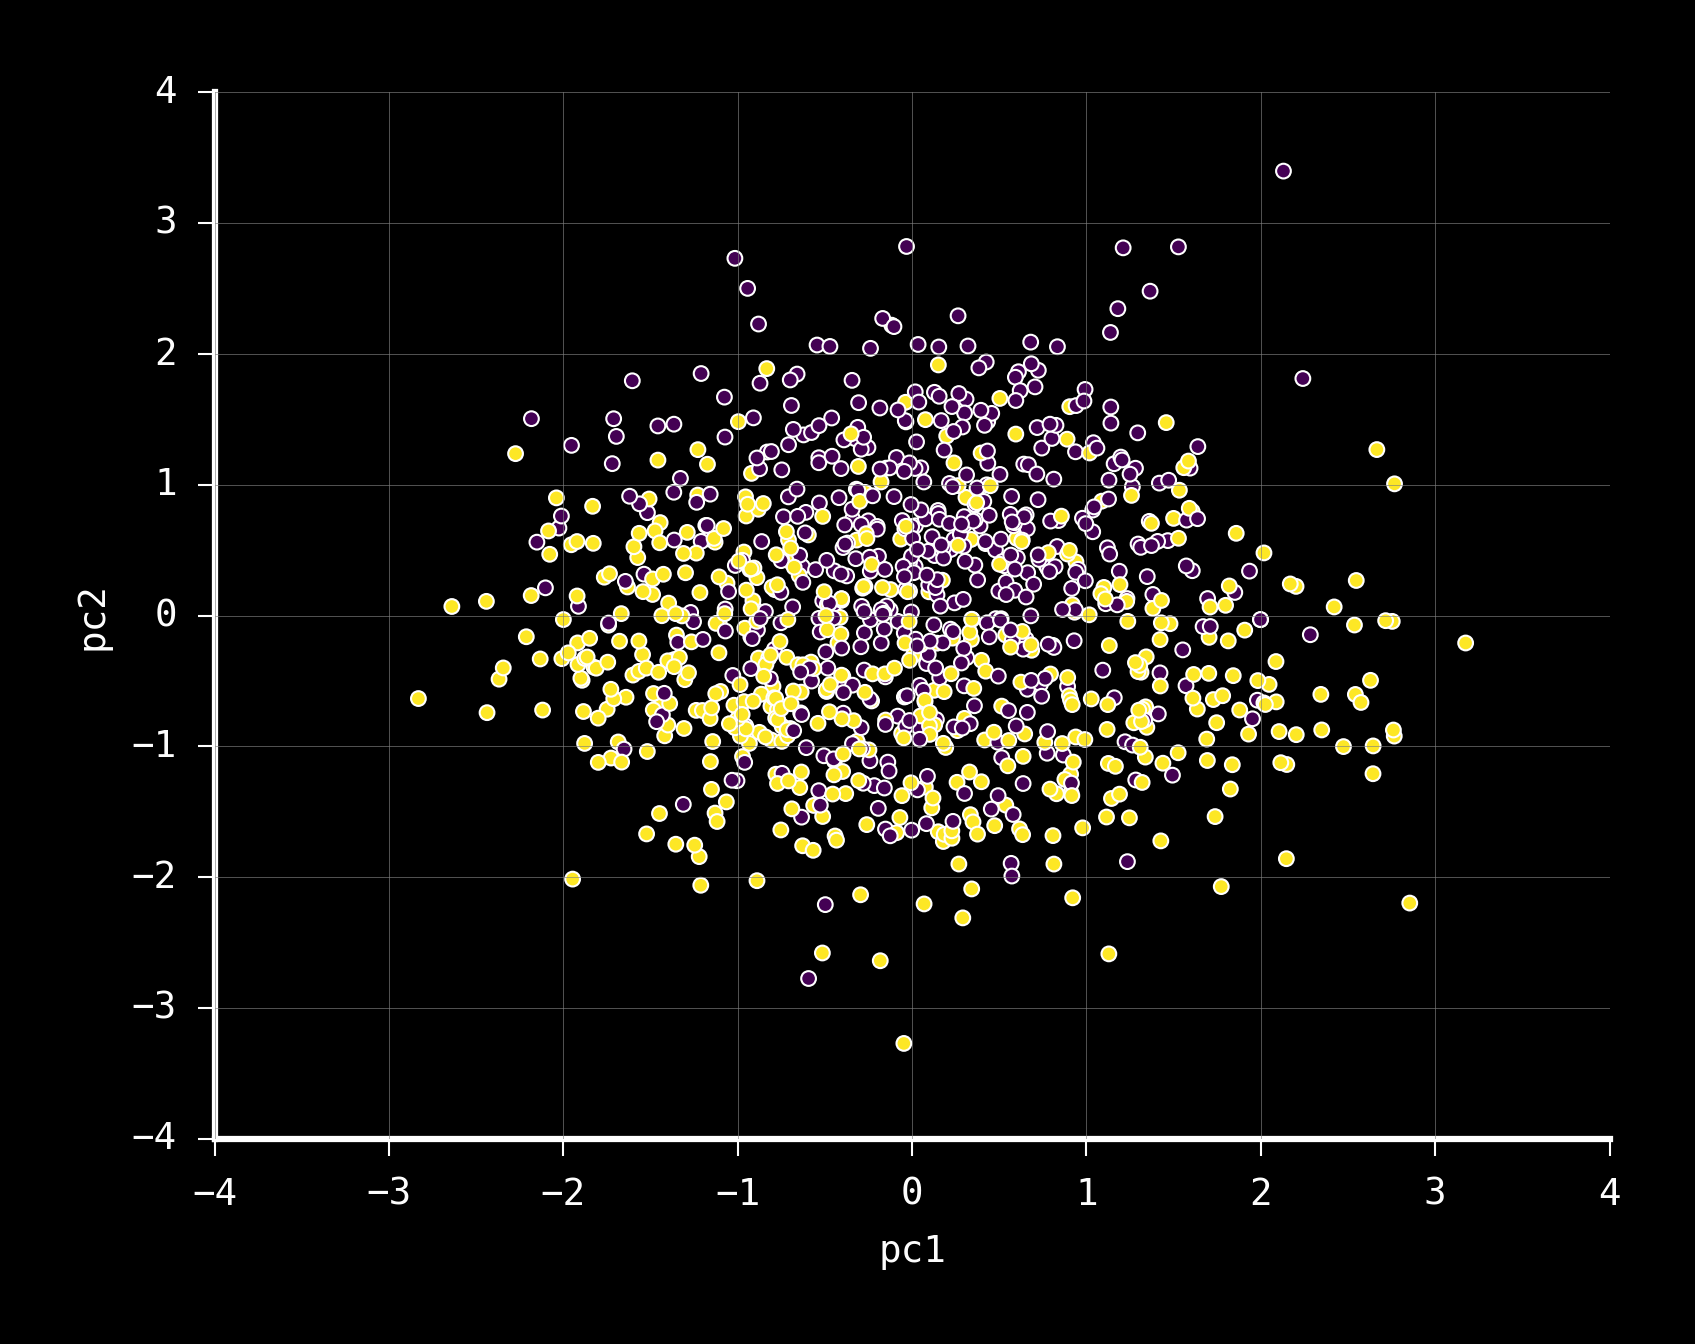

In [32]:
# Lets plot the data set in 2 dimensions
plt.scatter(X[:,3], X[:,4], c=y, s=50)
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.xlim(-4,4)
plt.ylim(-4,4)
hide_spines()
#plt.axis("off")
plt.savefig("img/fig_01_data_2d.png")

## Start the Classifier

In [105]:
# Initiate the Classifiers
names = [
     # 0, 1, 2, 3  
    "Logistic (x1,x2)", "Logistic (x2,x3)", "Logistic (x1,x3)", "Logistic (pc1,pc2)",
    
    # 4, 5, 6, 7
    "Logistic (C=1)", "Logistic (C=1e-2)", "Logistic (C=1e-4)", "Logistic (C=1e-6)", 
    
    # 8, 9, 10, 11
    "Naive Bayes", "ML Perceptron", "Decision Tree", "Nearest Neighbour",
    
    # 12, 13, 14, 15
    "Patching", "Bagging", "Random Subspace", "Random Patches",
    
    # 16, 17, 18, 19
    "Decision Tree", "Random Forest (10)", "Random Forest (50)", "Extremely Random",

    # 20, 21, 22, 23
    "Decision Tree", "Ada Boost", "Gradient Boosting (1)", "Gradient Boosting (2)"

    # 24, 25, 26, 27
    "Decision Tree", "Ada Boost", "Gradient Boosting (1)", "Voting - Hard"
    
    # 28, 29, 30, 31
    "Decision Tree", "Ada Boost", "Gradient Boosting (1)", "Voting - Soft"

    
]

classifiers = [
    LogisticRegression(random_state = 123, n_jobs=-1),
    LogisticRegression(random_state = 123, n_jobs=-1),
    LogisticRegression(random_state = 123, n_jobs=-1),
    LogisticRegression(random_state = 123, n_jobs=-1),
    
    LogisticRegression(C=1, random_state = 123, n_jobs=-1),
    LogisticRegression(C=1e-2, random_state = 123, n_jobs=-1),
    LogisticRegression(C=1e-4, random_state = 123, n_jobs=-1), 
    LogisticRegression(C=1e-6, random_state = 123, n_jobs=-1),
    
    GaussianNB(priors = [0.7,0.3]), 
    MLPClassifier(hidden_layer_sizes=2, activation="logistic"), 
    DecisionTreeClassifier(random_state=0),
    KNeighborsClassifier(n_neighbors=3),
    
    BaggingClassifier(DecisionTreeClassifier(random_state=0), max_samples=1.0, bootstrap=False),
    BaggingClassifier(DecisionTreeClassifier(random_state=0), max_samples=1.0, bootstrap=True),
    BaggingClassifier(DecisionTreeClassifier(random_state=0), max_features=1, bootstrap=False),
    BaggingClassifier(DecisionTreeClassifier(random_state=0), max_samples=0.5, max_features=1,
                      bootstrap=False),
    
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(n_estimators=10, n_jobs=-1),
    RandomForestClassifier(n_estimators=50, n_jobs=-1),
    ExtraTreesClassifier(n_estimators=10, n_jobs=-1),
    
    DecisionTreeClassifier(random_state=0),
    AdaBoostClassifier(n_estimators=50, random_state=0),
    GradientBoostingClassifier(n_estimators=50, max_depth=1, random_state=0),
    GradientBoostingClassifier(n_estimators=50, max_depth=2, random_state=0)
    
    
    
]

## Make a Mesh

In [93]:
# Create mesh points for plotting the boundaries for pca1 and pca2
def mesh(L):
    step = 0.1  # step size in the mesh
    a_min, a_max = L[:, 0].min() - .5, L[:, 0].max() + .5
    b_min, b_max = L[:, 1].min() - .5, L[:, 1].max() + .5
    aa, bb = np.meshgrid(np.arange(a_min, a_max, step),
                         np.arange(b_min, b_max, step))
    aabb = np.c_[aa.ravel(), bb.ravel()]
    shape = aa.shape
    return aa, bb, aabb, shape

## Make a Simple Model

In [94]:
# Create array to store the predictions and score
y_pred = np.empty([y_test.shape[0],40])
scores = np.empty([40])

In [95]:
# Create combination - (x1,x2), (x2,x3), (x1,x3), (pca1, pca2)
f = [[0,1],[1,2],[0,2],[3,4]]

In [96]:
X[:,f[1]]

array([[ 0.17844239,  1.58209573],
       [ 0.68036326, -1.58626516],
       [-0.42354286, -1.06608297],
       ..., 
       [-0.32718653, -0.01809345],
       [-1.90457156, -0.30096856],
       [-0.46496534,  1.46302128]])

In [97]:
X[:,f[3]]

array([[ 0.74374788,  1.28041011],
       [-1.44508664, -0.69357708],
       [-1.51838155, -1.03963628],
       ..., 
       [ 0.02922782, -0.23232309],
       [ 1.73775097, -1.53733154],
       [ 0.85628701,  0.75990558]])

In [110]:
# Make a simple model - Logistics Regression
def classifier_simple_plot(n1, n2, figname):
    # Run the classifier, score and plot them
    for idx in np.arange(n1,n2):
        clf = classifiers[idx]
        clf.fit(X_train[:,f[idx]], y_train)
        y_pred[:,idx] = clf.predict_proba(X_test[:,f[idx]])[:,1]
        #auc = roc_auc_score(y_test, y_pred[:,idx])
        auc = cross_val_score(clf, X_train[:,f[idx]], y_train, cv=5, scoring='roc_auc').mean()
        print(idx, f[idx], auc, names[idx])

        aa, bb, aabb, shape = mesh(X[:,f[idx]])
        
        Z = clf.predict_proba(aabb)[:, 1]
        Z = Z.reshape(shape)

        plt.subplot(2, 2, idx - n1 + 1)
        plt.scatter(X[:,f[idx][0]], X[:,f[idx][1]], c=y, s=50)
        plt.contourf(aa, bb, Z, alpha=0.8)
        plt.title(names[idx])
        plt.text(aa.max() - .3, bb.min() + .3, 'AUC = ' + ('%.4f' % auc).lstrip('0'), size=18,
            horizontalalignment='right', color = "black")
        plt.axis("off")
        idx += 1
    # Save the plot    
    plt.savefig("img/" + figname + ".png")

0 [0, 1] 0.679812263356 Logistic (x1,x2)
1 [1, 2] 0.729352638741 Logistic (x2,x3)
2 [0, 2] 0.682746771301 Logistic (x1,x3)
3 [3, 4] 0.734882499223 Logistic (pc1,pc2)
CPU times: user 3.13 s, sys: 159 ms, total: 3.29 s
Wall time: 3.08 s


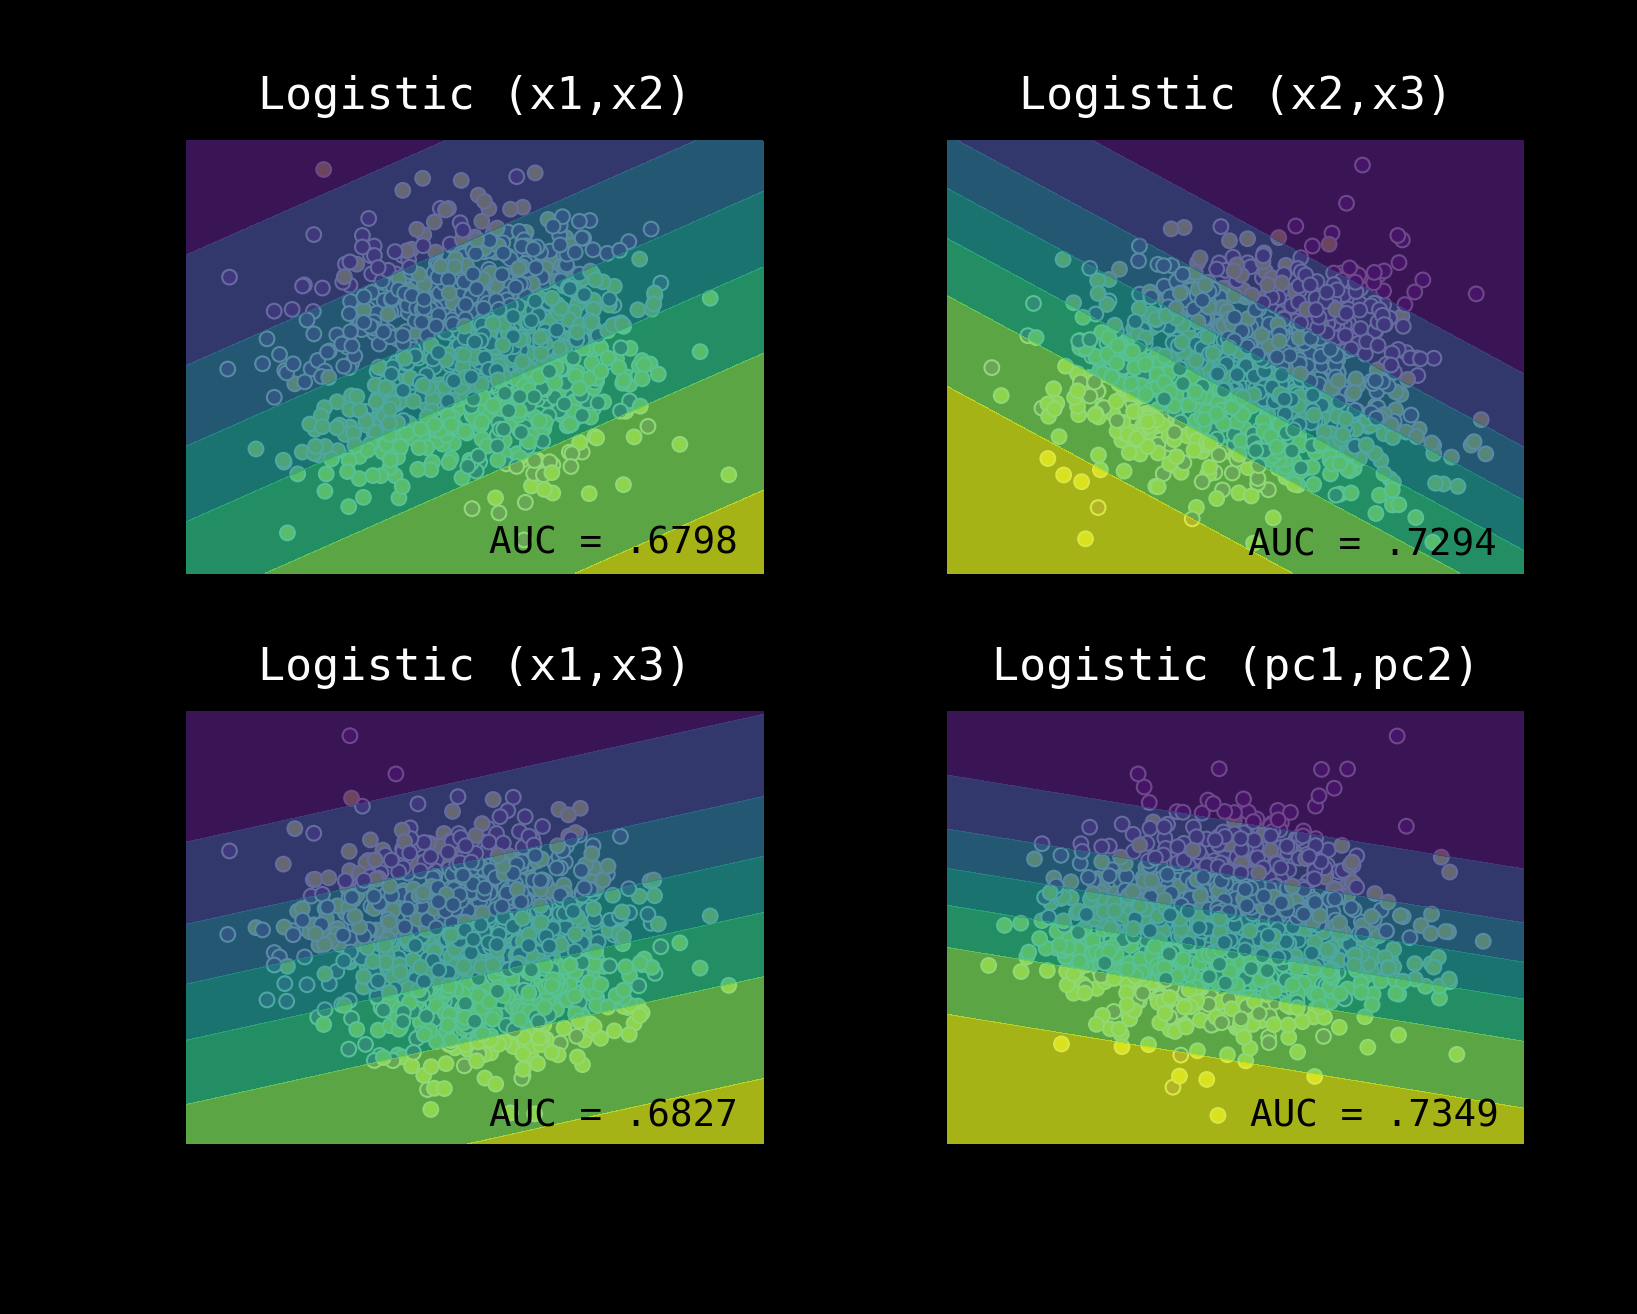

In [111]:
%%time
classifier_simple_plot(0, 4, "fig_02_simple_models")

## Run Multiple Classifier - PCA1 and PCA2

In [77]:
X[:,3:5]

array([[ 0.74374788,  1.28041011],
       [-1.44508664, -0.69357708],
       [-1.51838155, -1.03963628],
       ..., 
       [ 0.02922782, -0.23232309],
       [ 1.73775097, -1.53733154],
       [ 0.85628701,  0.75990558]])

In [78]:
xx4, xx5, xx4xx5, xx4Shape = mesh(X[:,3:5])

In [112]:
def classifier_plot(n1, n2, figname):
    # Run the classifier, score and plot them
    for idx in np.arange(n1,n2):
        
        clf = classifiers[idx]
        clf.fit(X_train[:,3:5], y_train)
        y_pred[:,idx] = clf.predict_proba(X_test[:,3:5])[:,1]
        #auc = roc_auc_score(y_test, y_pred[:,idx])
        auc = cross_val_score(clf, X_train[:,3:5], y_train, cv=5, scoring='roc_auc').mean()
        
        Z = clf.predict_proba(xx4xx5)[:, 1]
        Z = Z.reshape(xx4.shape)

        plt.subplot(2, 2, idx - n1 + 1)
        plt.scatter(X[:,3], X[:,4], c=y, s=50)
        plt.contourf(xx4, xx5, Z, alpha=0.8)
        plt.title(names[idx])
        plt.text(xx4.max() - .3, xx5.min() + .3, 'AUC = ' + ('%.4f' % auc).lstrip('0'), size=18,
            horizontalalignment='right', color = "black")
        plt.axis("off")
        idx += 1
    # Save the plot    
    plt.savefig("img/" + figname + ".png")

CPU times: user 3.01 s, sys: 176 ms, total: 3.19 s
Wall time: 2.75 s


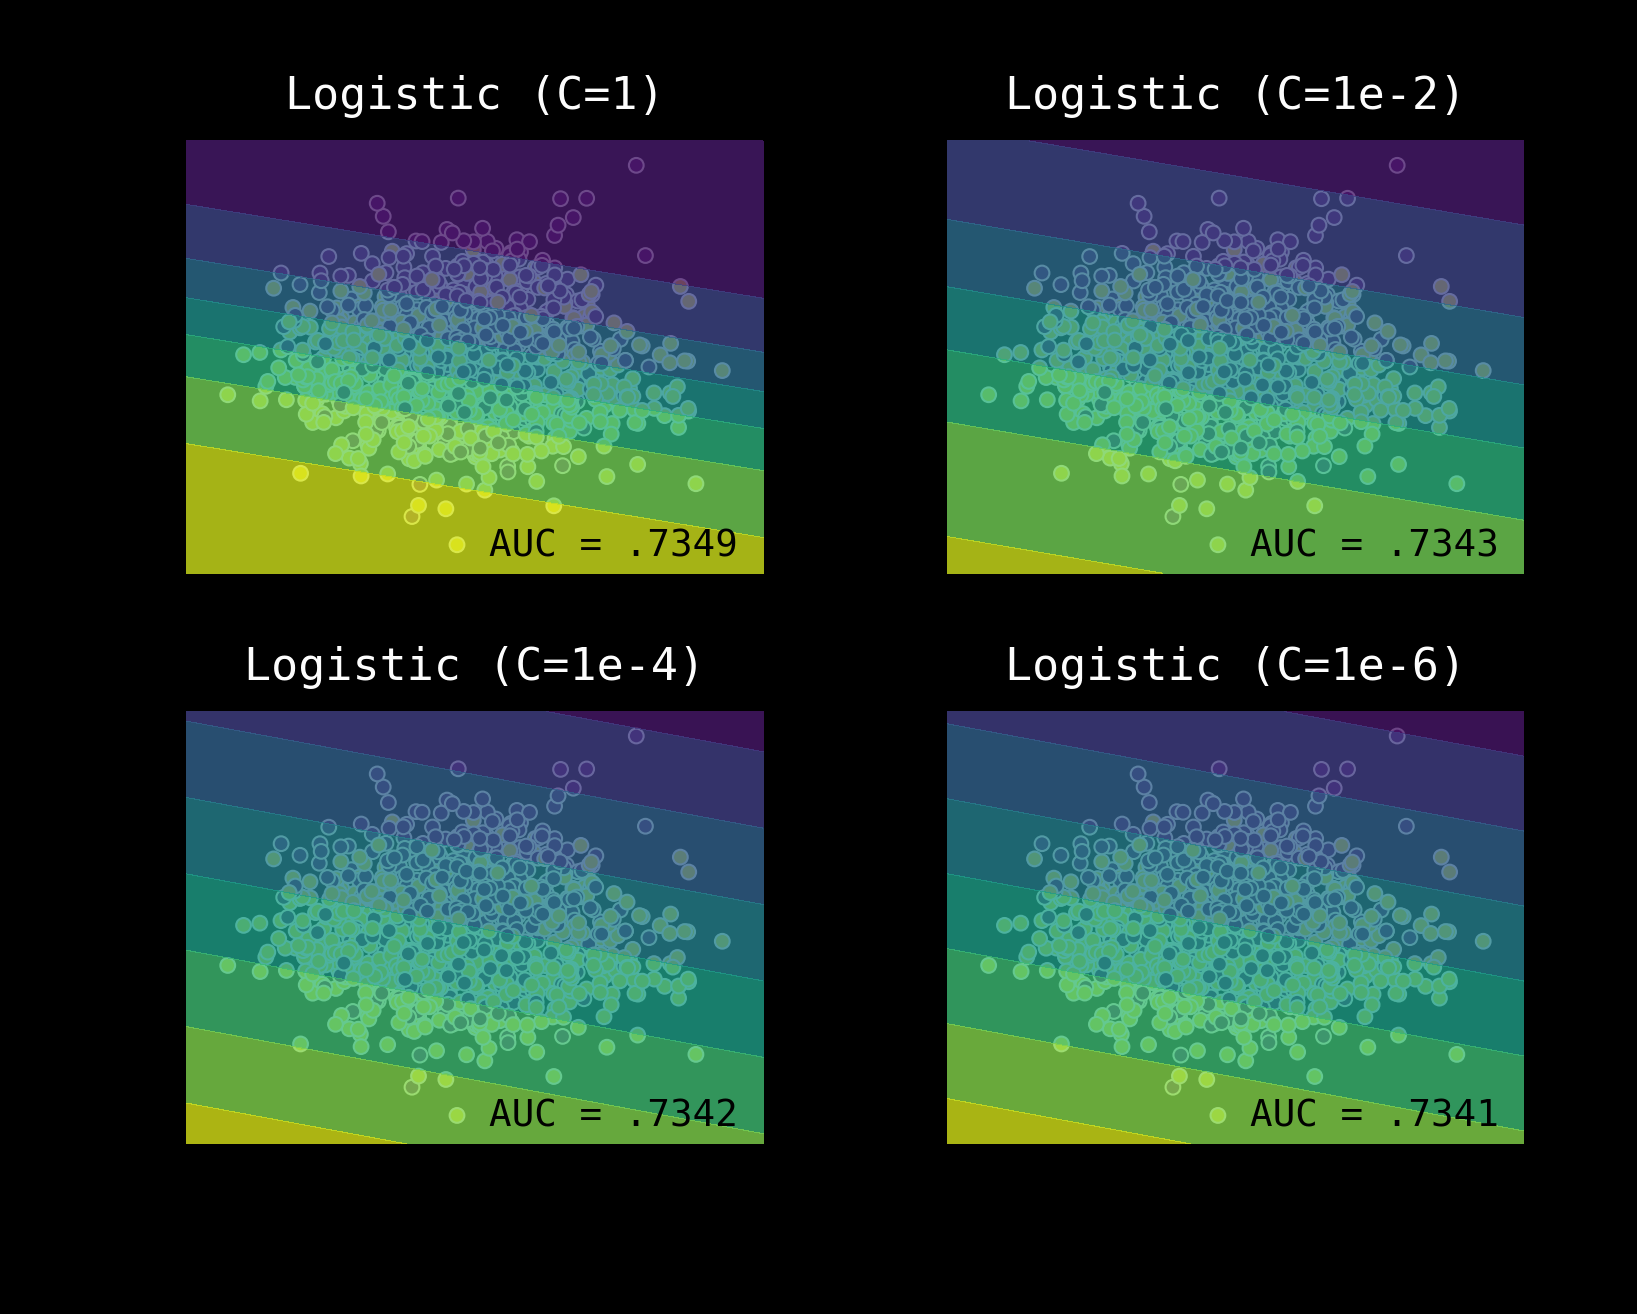

In [113]:
%%time
classifier_plot(4,8, "fig_03_simple_params")

/Users/amitkaps/miniconda3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/amitkaps/miniconda3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/amitkaps/miniconda3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/amitkaps/miniconda3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/a

CPU times: user 5.25 s, sys: 61.1 ms, total: 5.31 s
Wall time: 3.72 s


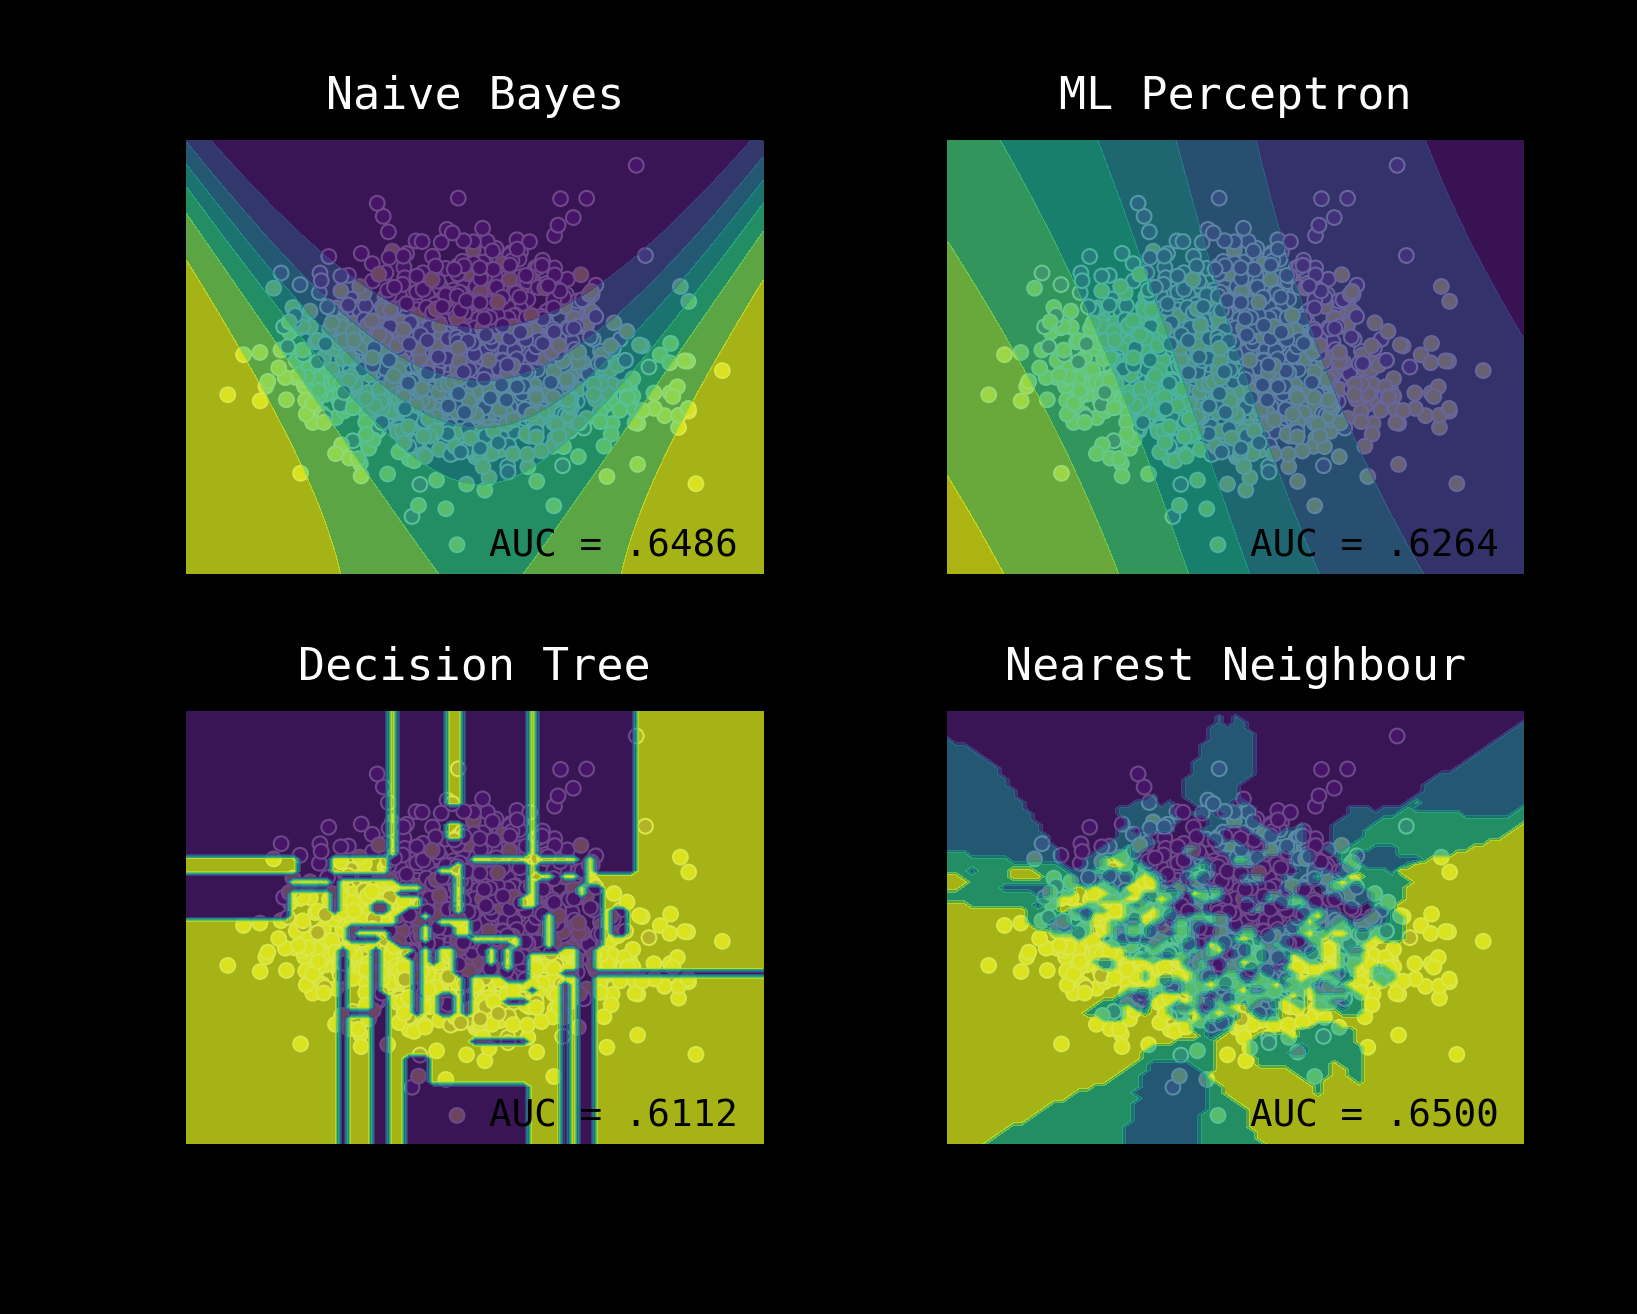

In [106]:
%%time
classifier_plot(8, 12, "fig_04_many_models")

## Patching, Bagging, RandomSubspace, Random Patches

CPU times: user 2.95 s, sys: 54.6 ms, total: 3 s
Wall time: 3.13 s


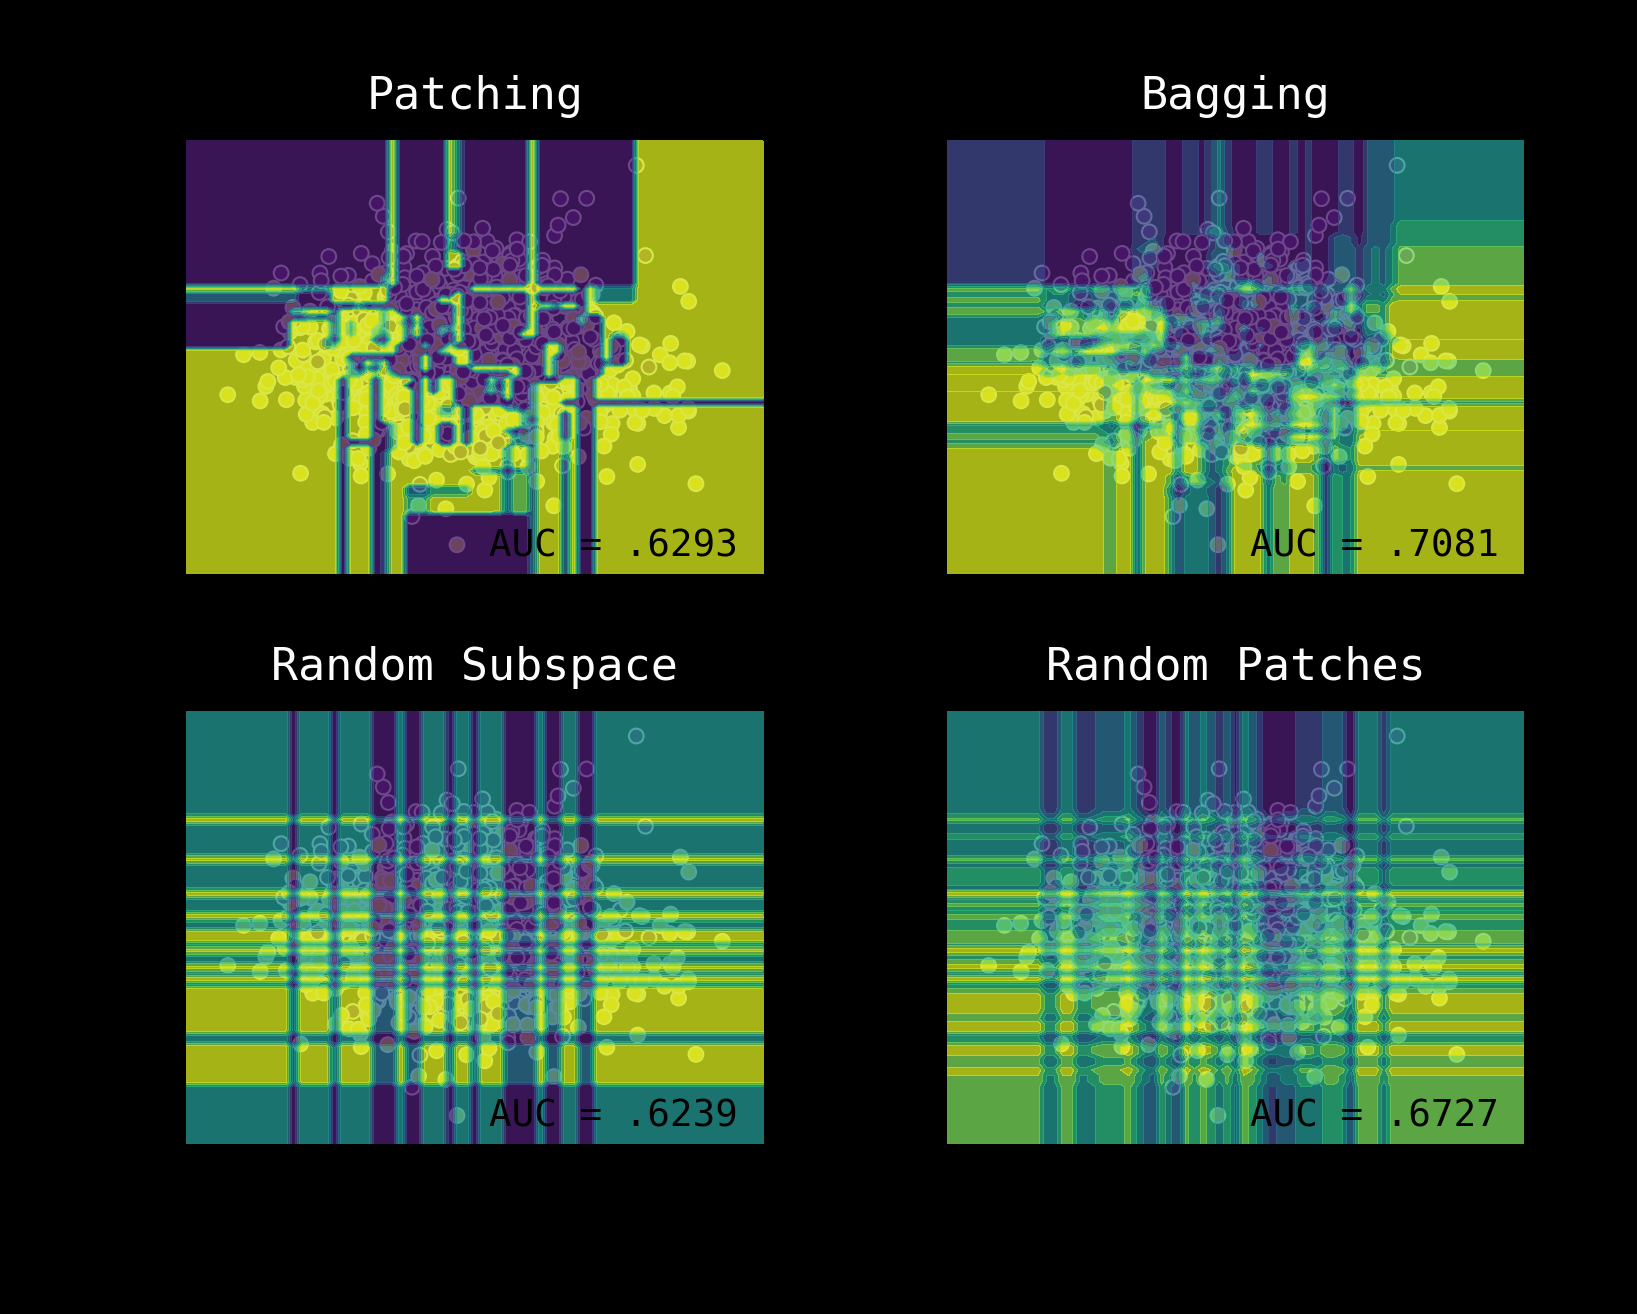

In [114]:
%%time
classifier_plot(12,16, "fig_05_bagging")

## Randomised Forest

CPU times: user 4.09 s, sys: 360 ms, total: 4.45 s
Wall time: 7.9 s


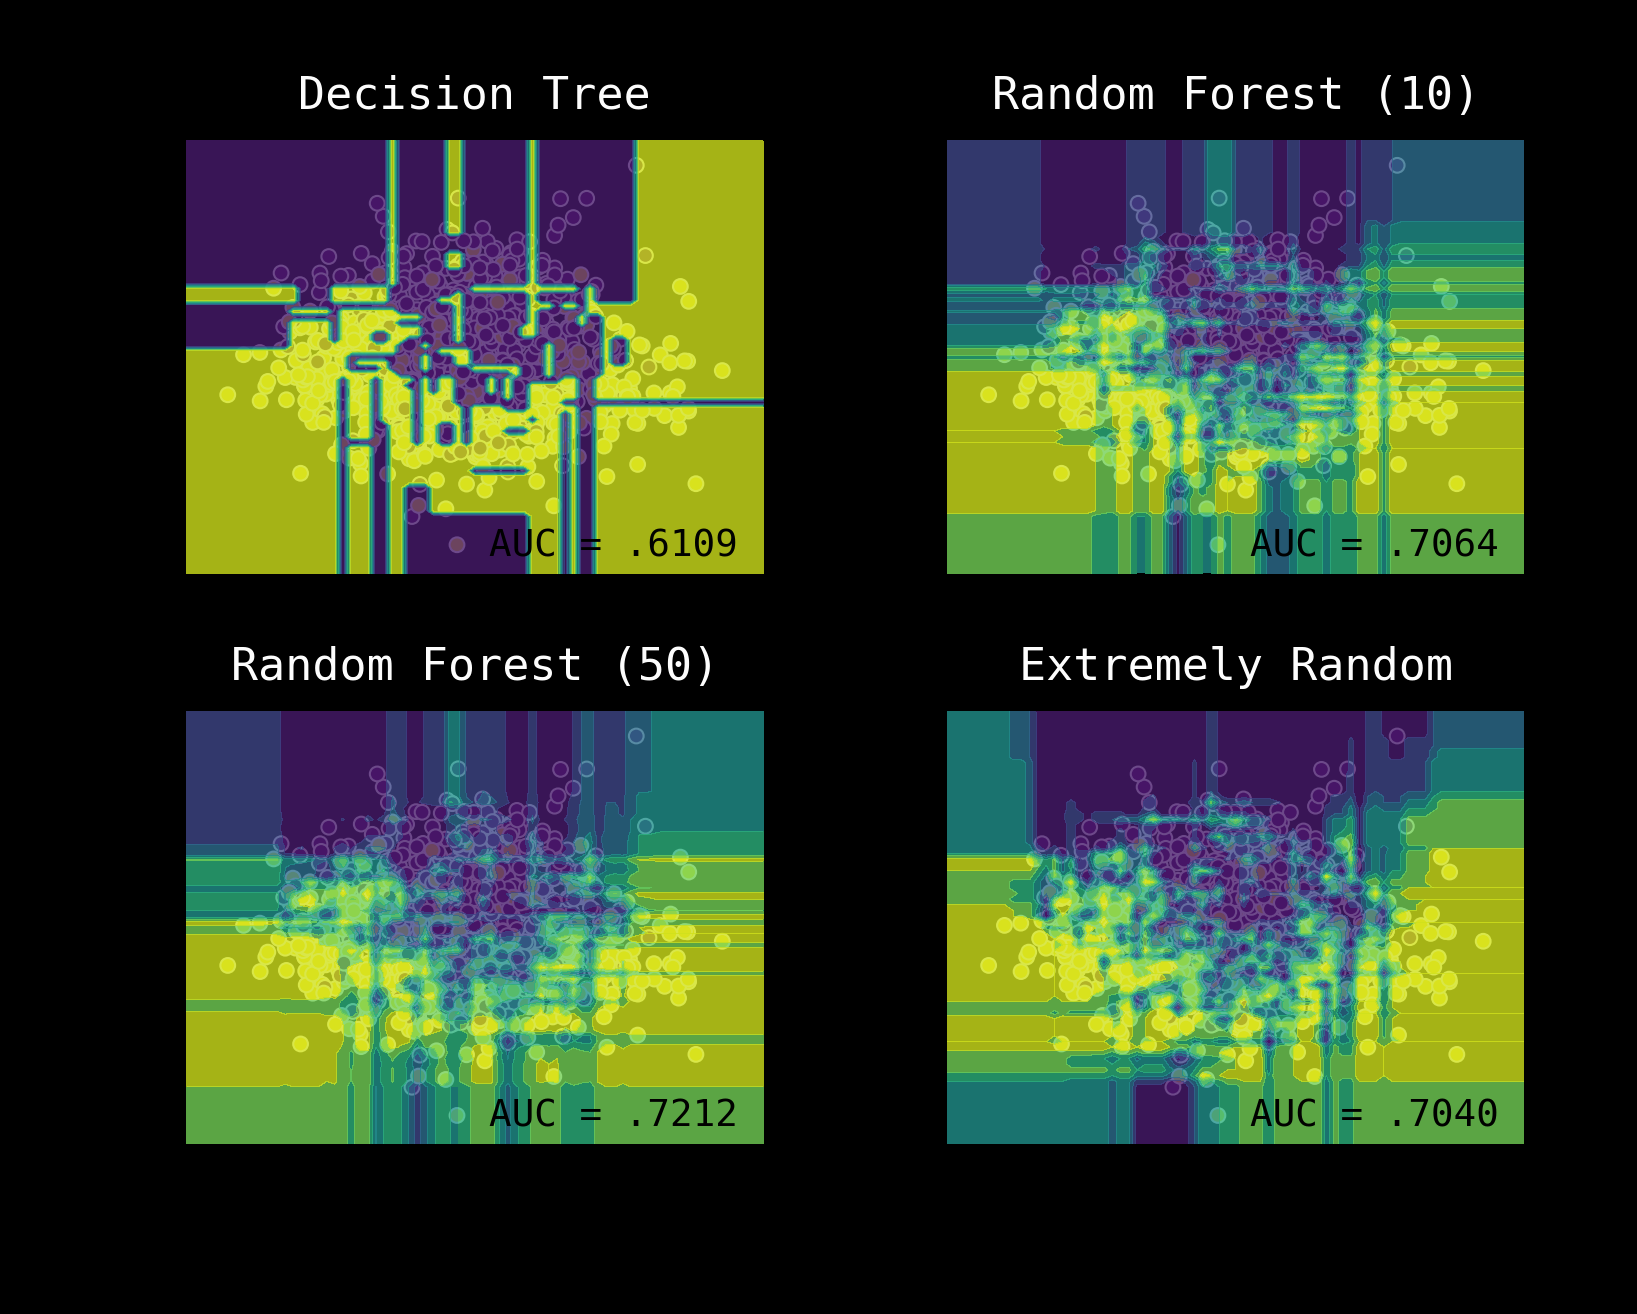

In [115]:
%%time
classifier_plot(16,20, "fig_06_forest")

CPU times: user 3.44 s, sys: 54.8 ms, total: 3.49 s
Wall time: 3.66 s


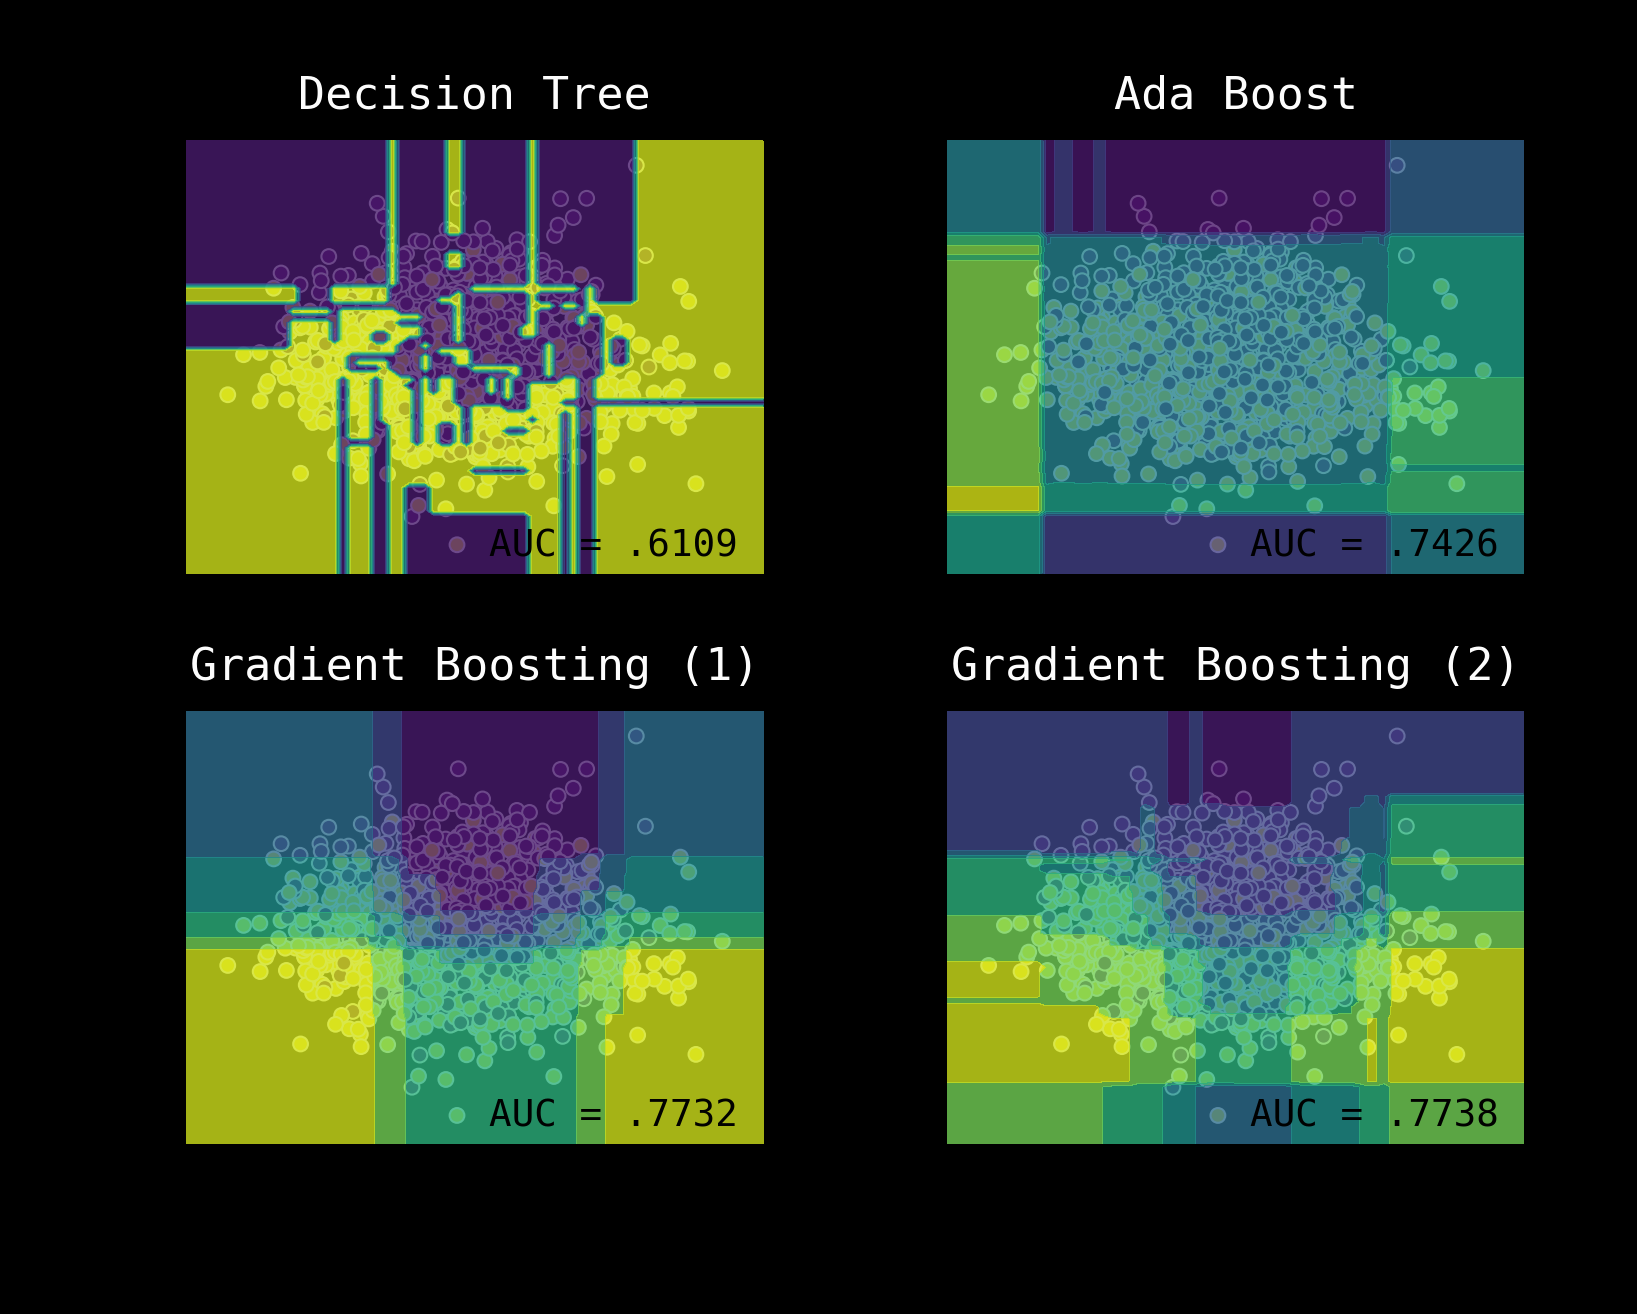

In [116]:
%%time
classifier_plot(20,24, "fig_07_Boosting")